# Titanic Pre work - AXA_Elaine_Chan


In [78]:
#import pandas and numpy
import pandas as pd
import numpy as np
import pylab as plt

In [79]:
#read in train data
td = pd.read_csv("train.csv")

In [80]:
#View the imported data
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [81]:
#Describe train data
td.describe()

# We see missing data in age

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
#impute the age
td["Age"].fillna(td.Age.mean(),inplace=True)
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
#Now import the random forest algorithm and roc/auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score


In [84]:
# 1st try model with numeric variables only
td.drop(['PassengerId','Name', 'Sex', 'Ticket','Cabin', 'Embarked'],axis=1, inplace=True)

In [85]:
y=td.pop("Survived")

In [86]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=66)
model.fit(td, y)
print "ROC_AUC: ", roc_auc_score(y,model.oob_prediction_)

# This 1st model is not the optimal one at 0.7298 and I will try to improve it

ROC_AUC:  0.729817104997


In [87]:
# Restore the train data set

td = pd.read_csv("train.csv")
td["Age"].fillna(td.Age.mean(),inplace=True)

In [88]:
#Now try to view the catergorical variables

def view_cat(data):
    from IPython.display import display, HTML
    display(HTML(data[data.columns[data.dtypes == "object"]].describe().to_html()))

view_cat(td)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [89]:
#Try to make the "Ticket" and "Cabin" by the grouping to getting the first letter

def get_firstletter(data):
    if data =="Missing":
        return "Missing"
    else:
        return data[0]

td["Ticket"] = td.Ticket.apply(get_firstletter)

In [90]:
# Fill in missing Cabin as "Missing" else get first letter
td["Cabin"].fillna("Missing", inplace=True)
td["Cabin"] = td.Cabin.apply(get_firstletter)


In [91]:
# Now Convert the categorical varibles into dummy in binary

Cat = ['Sex', 'Ticket','Cabin', 'Embarked']

for data in Cat:
    td[data].fillna("Missing", inplace=True)
    dummy = pd.get_dummies(td[data], prefix=data)
    td = pd.concat([td, dummy], axis=1)

In [92]:
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A,7.2500,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,P,71.2833,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,S,7.9250,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,1,53.1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,3,8.0500,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,3,8.4583,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,1,51.8625,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,3,21.0750,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,3,11.1333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,2,30.0708,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [93]:
import numpy as np
y=td.pop("Survived")

In [94]:
# 2nd try to include both number and categorial dummy variables
td.drop(['PassengerId','Name', 'Sex', 'Ticket','Cabin', 'Embarked'],axis=1, inplace=True)
td

model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=66)
model.fit(td, y)
print "ROC_AUC: ", roc_auc_score(y, model.oob_prediction_)

#ROC is improved to 0.8668

ROC_AUC:  0.866844555225


In [95]:
%matplotlib inline

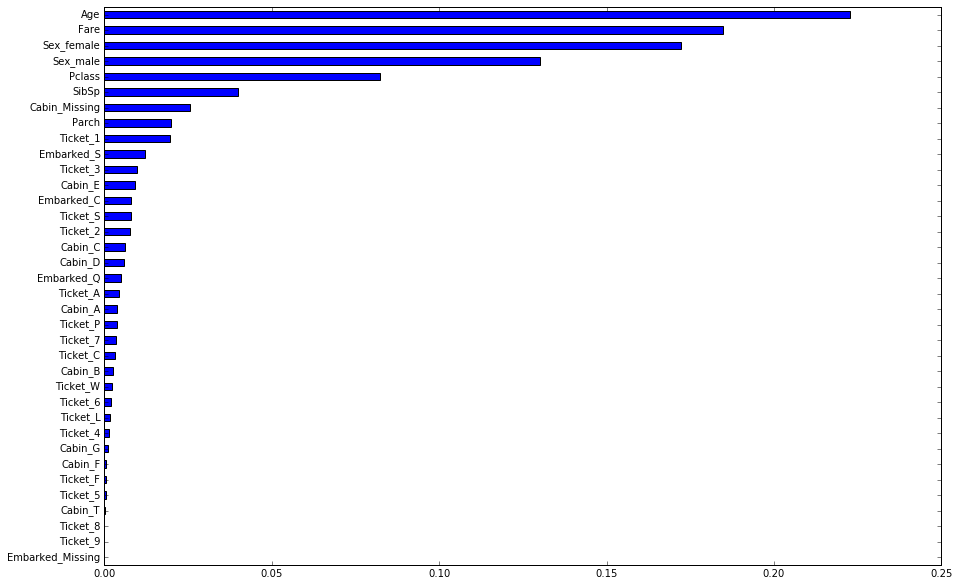

In [ ]:
impfea = pd.Series(model.feature_importances_, index=td.columns)

impfea.sort_values(inplace= True)

impfea.plot(kind="barh", figsize=(15,10))

In [ ]:
# Try to find the optimized parameter : tree size
compare = []
param = [30, 50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000]

for size in param:
    model = RandomForestRegressor(size, oob_score=True, n_jobs=-1, random_state=66)
    model.fit(td, y)
    print size,
    roc = roc_auc_score(y, model.oob_prediction_)
    print "size: ", roc
    compare.append(roc)
    print ""
    
# Size 500 is the optimal

30 size:  0.853252591101

50 size:  0.860440034513

100 size:  0.866844555225

200 size:  0.870532813515

500 size:  0.873382226057

1000 size:  0.871265139169

2000 size:  0.869875051929

3000 size:  0.870133363159

4000 size:  0.869885703938



In [ ]:
# Try to find the optimized parameter : split
compare = []
param = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for split in param:
    model = RandomForestRegressor(500, oob_score=True, n_jobs=-1, random_state=66, max_features=split)
    model.fit(td, y)
    print split, 
    roc = roc_auc_score(y, model.oob_prediction_)
    print "split: ", roc
    compare.append(roc)
    print "";
       
# auto split is the optimal

In [ ]:
# Try to find the optimized parameter : leaf

compare = []
param = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for leaf in param:
    model = RandomForestRegressor(500, oob_score=True, n_jobs=-1, random_state=66, max_features="auto", min_samples_leaf=leaf)
    model.fit(td, y)
    print leaf,
    roc = roc_auc_score(y, model.oob_prediction_)
    print "min leaf: ",roc
    compare.append(roc)
    print "";
    
# Min Leaf = 5 is the optimal

In [ ]:
td

In [ ]:
# Final Model 
model = RandomForestRegressor(500, oob_score=True,n_jobs=-1,random_state=66, max_features="auto", min_samples_leaf=5)
model.fit(td, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "Result of Final Model ROC_AUC: ", roc

# Model is now improved to 0.8812

In [ ]:
# Now use the final model to score the test data

te = pd.read_csv("test.csv")

In [ ]:
te["Age"].fillna(te.Age.mean(),inplace=True)
te["Fare"].fillna(te.Age.mean(),inplace=True)
te.describe()

In [ ]:
def get_firstletter(data):
    if data =="Missing":
        return "Missing"
    else:
        return data[0]

te["Ticket"] = te.Ticket.apply(get_firstletter)

In [ ]:
# Fill in missing Cabin as "Missing" else get first letter
te["Cabin"].fillna("Missing", inplace=True)
te["Cabin"] = te.Cabin.apply(get_firstletter)
te

In [ ]:
Cat = ['Sex', 'Ticket','Cabin', 'Embarked']

for data in Cat:
    te[data].fillna("Missing", inplace=True)
    dummy = pd.get_dummies(te[data], prefix=data)
    te = pd.concat([te, dummy], axis=1)

In [ ]:
#Save up PassengerId as output
pid = te['PassengerId'].values
pid

In [ ]:
te.drop(['PassengerId','Name', 'Sex', 'Ticket','Cabin', 'Embarked'],axis=1, inplace=True)
te

In [ ]:
te.describe()

In [ ]:
te["Ticket_5"]=0
te["Ticket_8"]=0
te["Cabin_T"]=0
te["Embarked_Missing"]=0
te

In [ ]:
import csv as csv

print 'Final Training Model Parameter details:'
fmodel = RandomForestClassifier(500, oob_score=True,n_jobs=-1,random_state=66, max_features="auto", min_samples_leaf=5)
fmodel = fmodel.fit( td,y )
print fmodel
print ''

print 'After Prediction as below:'
output = fmodel.predict(te)
output = fmodel.predict(te).astype(int)
print output

predictions_result = open("elaine_output.csv", "wb")
open_file_object = csv.writer(predictions_result)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(pid, output))
predictions_result.close()
print 'Completed.'